In [1]:
import numpy as np
import sys
sys.path.append('/home/cayjobla/Desktop/Research/delay-optimizer')
from DelayEffects.Analyzer import Analyzer
import os
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib

In [2]:
# Initialize
loss_name = 'Rastrigin'
rast2d = Analyzer(2, loss_name)
rast10d = Analyzer(10, loss_name)
rast100d = Analyzer(100, loss_name)
rast1000d = Analyzer(1000, loss_name)
rast10000d = Analyzer(10000, loss_name)

# Scatterplot Convergence Stochastic

In [3]:
rast2d.initialize_points(500, 'random')
rast2d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

In [6]:
rast2d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                 time_plot=[0], cmap2='winter_r')

NameError: name 'rast2d' is not defined

In [7]:
rast10d.initialize_points(500, 'random')
rast10d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

In [7]:
rand_dims = np.random.choice(np.arange(10), size=2, replace=False)
rast10d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                  plot_dims=[rand_dims], time_plot=[0], cmap2='winter_r')

NameError: name 'np' is not defined

In [9]:
rast100d.initialize_points(500, 'random')
rast100d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

In [8]:
rand_dims = np.random.choice(np.arange(100), size=2, replace=False)
rast100d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                   plot_dims=[rand_dims], time_plot=[0], cmap2='winter_r')

NameError: name 'np' is not defined

In [11]:
rast1000d.initialize_points(500, 'random')
rast1000d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

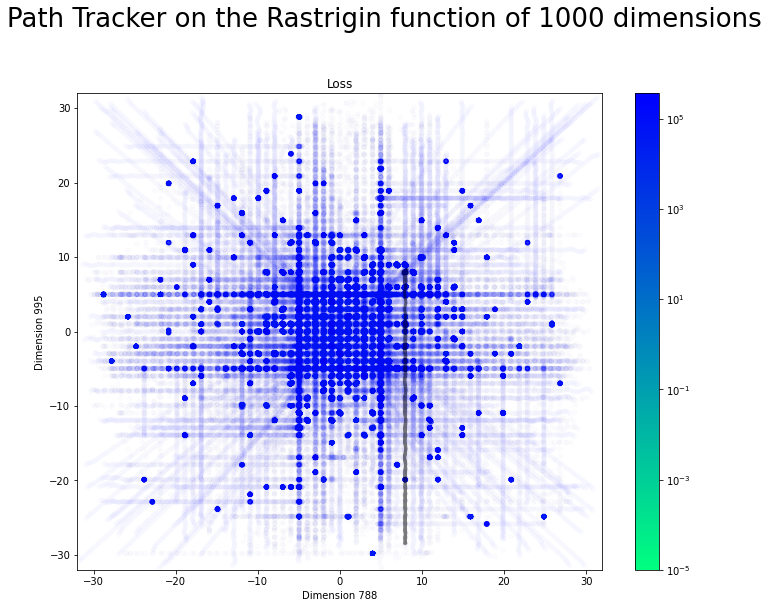

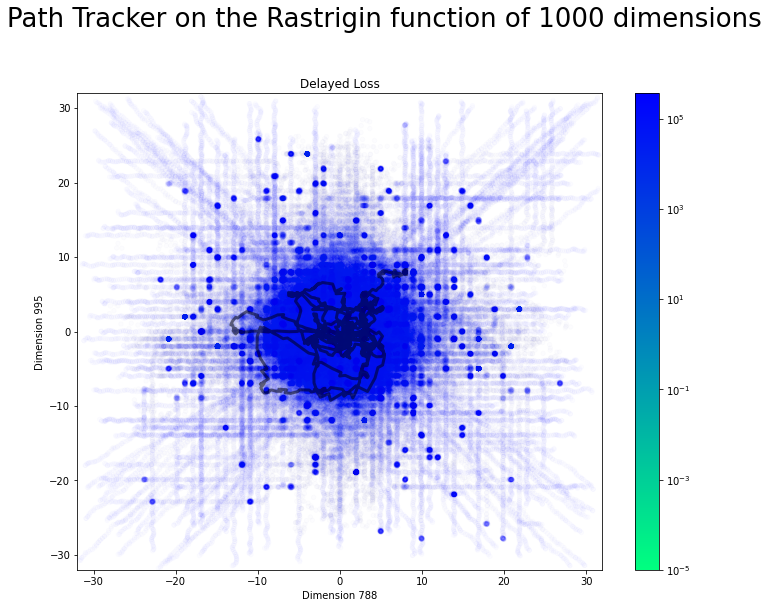

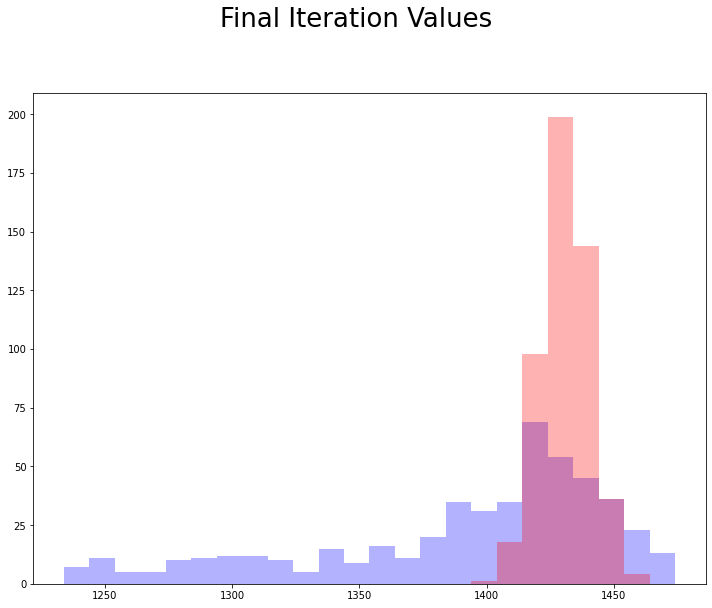

In [12]:
rand_dims = np.random.choice(np.arange(1000), size=2, replace=False)
rast1000d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                    plot_dims=[rand_dims], time_plot=[0], cmap2='winter_r')

## Loss Surface Visualization

In [3]:
filename = 'rast2dgrid100.pkl'
if os.path.exists(filename):
    rast2d.load_vals(filename)
else:
    num_points = 100
    rast2d.optimize(num_points, 'grid', 'both', break_opt=True, 
                     print_loss=False, clear_data=False, 
                     save_grad=False, save_iters=False)
    # Save as pickle so we don't need to again
    rast2d.save_vals(filename)

In [4]:
%matplotlib notebook

In [6]:
f = rast2d.loss
x_inits, (X, Y) = rast2d.create_grid(1000)
Z = np.array([f(x) for x in x_inits]).reshape((1000,1000))
vmax = max([np.max(loss) for loss in Z.ravel()])
vmin = 0

<IPython.core.display.Javascript object>


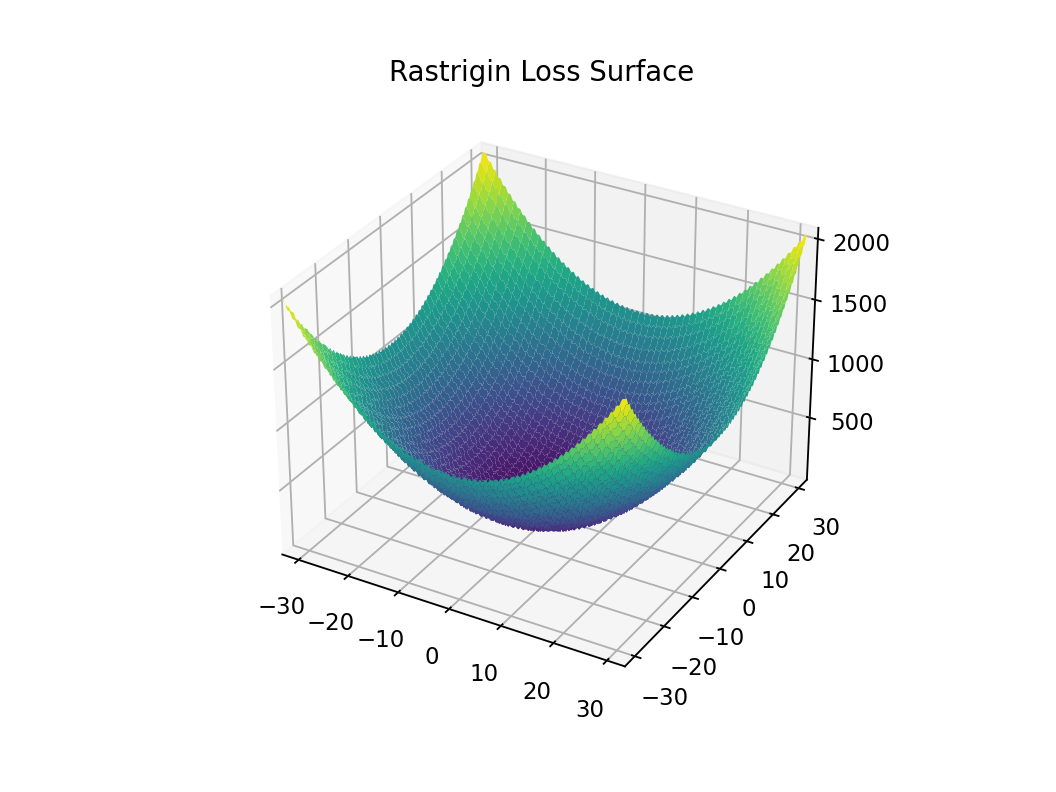

In [9]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d') 
surf = ax.plot_surface(X, Y, Z, cmap='viridis', vmin=vmin, vmax=vmax)
ax.set_xlim(rast2d.range_grid)
ax.set_ylim(rast2d.range_grid)
plt.title("Rastrigin Loss Surface")
#rast2d.plot_colorbar(fig, ax, surf)
plt.savefig("rast_loss.png")
plt.show()

In [4]:
# Initialize
num_points = len(rast2d.x_inits)
X, Y = rast2d.grid
bounds = rast2d.range_grid

# Initialize the plot and set attributes
fig = plt.figure(dpi=150, figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

vmax, vmin = rast2d.set_bounds([Z_init.ravel()], False)
zlim = [0, vmax]

# Create the initialization function
def init():    
    # Set limits
    surf1 = ax1.plot_surface(X, Y, Z_init, cmap=plt.cm.cividis, vmin=vmin, vmax=vmax)
    ax1.set_xlim(bounds)
    ax1.set_ylim(bounds)
    ax1.set_zlim(zlim)
    ax1.set_title("Undelayed")
    
    surf2 = ax2.plot_surface(X, Y, Z_init, cmap=plt.cm.cividis, vmin=vmin, vmax=vmax)
    ax2.set_xlim(bounds)
    ax2.set_ylim(bounds)
    ax2.set_zlim(zlim)
    ax2.set_title("Stochastic Delays")
    
    plt.colorbar(surf1, ax=ax1, pad=0.2)
    plt.colorbar(surf2, ax=ax2, pad=0.2)


# Create the update function
def update(i):
    ax1.clear()     # Clear the previous frame
    ax2.clear()
    
    # Get delayed and undelayed loss values
    Z, del_Z = np.zeros_like(Z_init.ravel()), np.zeros_like(Z_init.ravel())
    for j in range(num_points):
        if i < len(loss_vals[j]):
            Z[j] = loss_vals[j][i]
        else:
            Z[j] = rast2d.final_losses[j]
        if i < len(del_loss_vals[j]):
            del_Z[j] = del_loss_vals[j][i]
        else:
            del_Z[j] = rast2d.del_final_losses[j]
            
    # Get largest loss value
    vmax, vmin = rast2d.set_bounds(np.hstack([Z, del_Z]), False)
    zlim = [0, vmax]
            
    Z = np.resize(Z, (len(X),len(Y))).T
    del_Z = np.resize(del_Z, (len(X),len(Y))).T
    
    # Set limits
    surf1 = ax1.plot_surface(X, Y, Z, cmap=plt.cm.cividis, vmin=vmin, vmax=vmax)
    ax1.set_xlim(bounds)
    ax1.set_ylim(bounds)
    ax1.set_zlim(zlim)
    ax1.set_title("Undelayed")
    
    surf2 = ax2.plot_surface(X, Y, del_Z, cmap=plt.cm.cividis, vmin=vmin, vmax=vmax)
    ax2.set_xlim(bounds)
    ax2.set_ylim(bounds)
    ax2.set_zlim(zlim)
    ax2.set_title("Stochastic Delays")
    
    fig.suptitle(f"Iteration: {i}")
    
    return 

# Animate
animation.writer = animation.writers['ffmpeg']
plt.title("Loss Surface")
plt.ioff()
ani = animation.FuncAnimation(fig, update, init_func=init, frames=2000, interval=100)
ani.save('Rast2dLossEvolutionLinear.mp4')
plt.close()

NameError: name 'rast2d' is not defined

<video video width="900" src="Rast2dLossEvolution.mp4" controls>

# Subplots Array

In [3]:
rast2d.initialize_points(500, 'random')
rast2d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

In [4]:
rast10d.initialize_points(500, 'random')
rast10d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

In [5]:
rast100d.initialize_points(500, 'random')
rast100d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

In [6]:
rast1000d.initialize_points(500, 'random')
rast1000d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

In [3]:
# Initialize figure
fig, axes = plt.subplots(2, 4, figsize=(30, 15), dpi=400)

# Choose which plots to make
plots_arr = np.array([[
    [{'plot_type':'iters', 'delayed':False, 'focus':'loss', 'alpha':0.003}, 
     {'plot_type':'paths', 'delayed':False}],
    [{'plot_type':'iters', 'delayed':True, 'focus':'loss', 'alpha':0.003}, 
     {'plot_type':'paths', 'delayed':True}]
]], dtype=object)

# Plot
rast2d.plot_array(plots_arr, axes[:,0])
rast10d.plot_array(plots_arr, axes[:,1])
rast100d.plot_array(plots_arr, axes[:,2])
rast1000d.plot_array(plots_arr, axes[:,3])

# Format plots
for ax in np.ravel(axes):
    ax.set_xlabel("")
    ax.set_ylabel("")
label_size = 20
axes[0,0].set_ylabel("Undelayed", size=label_size)
axes[0,0].set_title("2d", size=label_size)
axes[1,0].set_ylabel("Delayed", size=label_size)
axes[0,1].set_title("10d", size=label_size)
axes[0,2].set_title("100d", size=label_size)
axes[0,3].set_title("1000d", size=label_size)
fig = plt.gcf()
fig.suptitle("Rastrigin Iteration Plots", size=30)

plt.savefig("rast_iter_plots.png")
plt.show()

NameError: name 'plt' is not defined

In [2]:
# Initialize figure
fig, axes = plt.subplots(2, 3, figsize=(30, 20), dpi=400)

# Choose which plots to make
plots_arr = np.array([[
    [{'plot_type':'iters', 'delayed':False, 'focus':'loss', 'alpha':0.003}, 
     {'plot_type':'paths', 'delayed':False}],
    [{'plot_type':'iters', 'delayed':True, 'focus':'loss', 'alpha':0.003}, 
     {'plot_type':'paths', 'delayed':True}]
]], dtype=object)

# Plot
rast2d.plot_array(plots_arr, axes[:,0])
rast10d.plot_array(plots_arr, axes[:,1])
rast1000d.plot_array(plots_arr, axes[:,2])

# Format plots
for ax in np.ravel(axes):
    ax.set_xlabel("")
    ax.set_ylabel("")
label_size = 20
axes[0,0].set_ylabel("Undelayed", size=label_size)
axes[0,0].set_title("2d", size=label_size)
axes[1,0].set_ylabel("Delayed", size=label_size)
axes[0,1].set_title("10d", size=label_size)
axes[0,2].set_title("1000d", size=label_size)
fig = plt.gcf()
fig.suptitle("Rastrigin Iteration Plots", size=30)

plt.savefig("rast_iter_plots_small.png")
plt.show()

NameError: name 'plt' is not defined

In [1]:
# Initialize figure
fig, axes = plt.subplots(2, 4, figsize=(30, 15), dpi=400)

# Choose which plots to make
plots_arr = np.array([[
    {'plot_type':'conv', 'delayed':False, 'alpha':0.2},
    {'plot_type':'conv', 'delayed':True, 'alpha':0.2}
]], dtype=object)

# Plot
rast2d.plot_array(plots_arr, axes[:,0])
rast10d.plot_array(plots_arr, axes[:,1])
rast100d.plot_array(plots_arr, axes[:,2])
rast1000d.plot_array(plots_arr, axes[:,3])

# Format plots
for ax in np.ravel(axes):
    ax.set_xlabel("")
    ax.set_ylabel("")
label_size = 20
axes[0,0].set_ylabel("Undelayed", size=label_size)
axes[0,0].set_title("2d", size=label_size)
axes[1,0].set_ylabel("Delayed", size=label_size)
axes[0,1].set_title("10d", size=label_size)
axes[0,2].set_title("100d", size=label_size)
axes[0,3].set_title("1000d", size=label_size)
fig = plt.gcf()
fig.suptitle("Rastrigin Convergence Plots", size=30)

plt.savefig("rast_conv_plot.png")
plt.show()

NameError: name 'plt' is not defined